<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
This is my LTSM stock prediction

In [3]:
!pip3 install yfinance


     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     -- ------------------------------------ 61.4/948.2 kB 1.6 MB/s eta 0:00:01
     ----------------------- -------------- 593.9/948.2 kB 7.4 MB/s eta 0:00:01
     -------------------------------------  942.1/948.2 kB 8.5 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/102.2 kB ? eta -:--:--
   ---------------------------------------- 102.2/102.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2

# Import all the required libraries

---



In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
print("hello!")

hello!


# Define start day to fetch the dataset from the yahoo finance library

---



In [7]:


START = "2010-01-01"
TODAY = "2016-01-01"

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

print("hello!")

hello!


In [8]:
data = load_data('TCS.NS')
df=data
df.head()
print("hello!")

[*********************100%***********************]  1 of 1 completed

hello!


In [9]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9624\1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

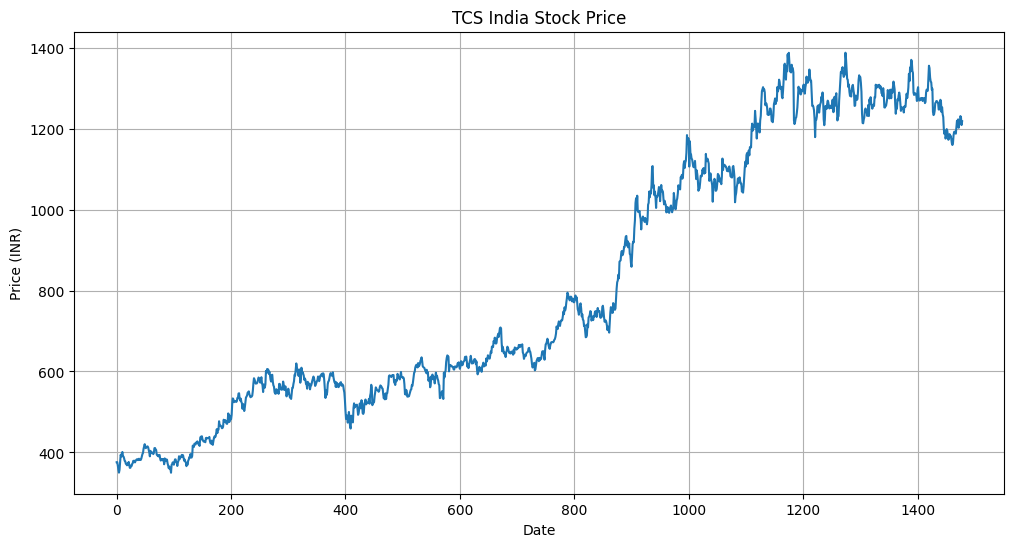

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [11]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
1474,1217.125000,1219.099976,1202.000000,1210.500000,843160
1475,1231.349976,1233.199951,1210.099976,1214.000000,3704198
1476,1227.900024,1232.650024,1222.875000,1229.175049,1708524


# Plotting moving averages of 100 day

---



In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1474,1256.46100
1475,1256.24075
1476,1256.11650
1477,1255.65425


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

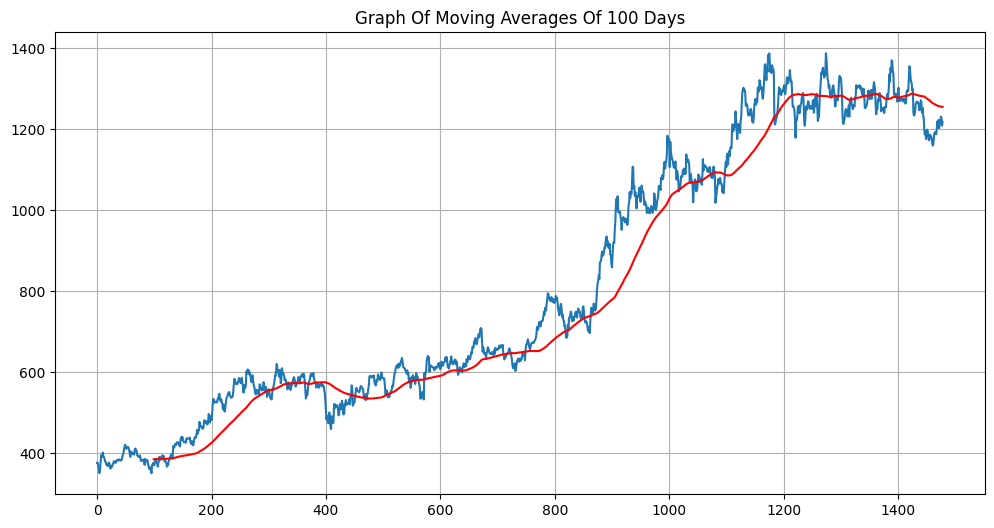

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1474,1267.978251
1475,1267.270001
1476,1266.668376
1477,1266.097126


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

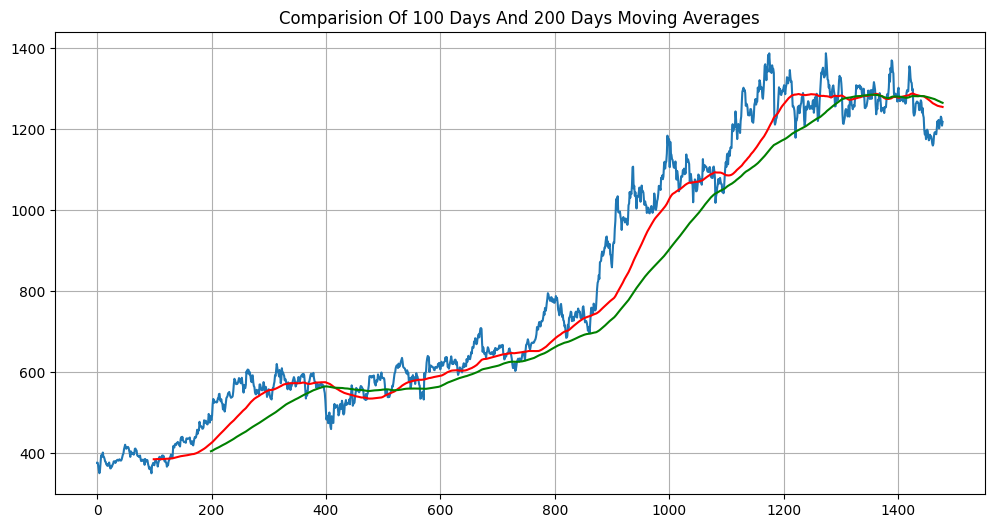

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [16]:
df.shape

(1479, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [17]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1035, 7)
(444, 7)


In [18]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,295.029724,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,295.108124,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,288.435394,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,280.408600,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,274.678101,349.899994,359.250000,348.250000,358.000000,6048178


In [19]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1035,2014-03-07,926.056396,1114.250000,1125.025024,1076.400024,1122.750000,4698472
1036,2014-03-10,890.380737,1071.324951,1114.250000,1067.500000,1114.050049,3829768
1037,2014-03-11,894.120972,1075.824951,1088.824951,1061.000000,1077.500000,2550254
1038,2014-03-12,905.673157,1089.724976,1094.875000,1076.500000,1076.500000,1669788
1039,2014-03-13,893.248474,1074.775024,1101.000000,1068.425049,1074.025024,2019884


# Using MinMax scaler for normalization of the dataset

---



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [22]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03886096],
       [0.0373382 ],
       [0.02908482],
       ...,
       [0.93726207],
       [0.94856102],
       [0.94222622]])

In [23]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [25]:
x_train.shape

(935, 100, 1)

# ML Model (LSTM)

---



In [26]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

g:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [29]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - loss: 0.1117 - mean_absolute_error: 0.2645
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0154 - mean_absolute_error: 0.0888
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0086 - mean_absolute_error: 0.0680
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0116 - mean_absolute_error: 0.0803
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - loss: 0.0069 - mean_absolute_error: 0.0598
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - loss: 0.0075 - mean_absolute_error: 0.0624
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0075 - mean_absolute_error: 0.0616
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0077 - mean_absolute_error: 0.0609
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - loss: 0.0062 - mean_absolute_error: 0.0565
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0059 - mean_absolute_error: 0.0562
Epoch 11/100
30/30

In [30]:
model.save('keras_model.h5')

In [31]:
test_close.shape

(444, 1)

In [32]:
past_100_days = pd.DataFrame(train_close[-100:])

In [33]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [35]:
#final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [36]:
final_df.head()

,0
0,1041.199951
1,1062.500000
2,1100.500000
3,1047.849976
4,1030.775024


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

g:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
g:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
g:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
g:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

array([[0.14654485],
       [0.20208605],
       [0.3011734 ],
       [0.1638852 ],
       [0.11936121],
       [0.10430248],
       [0.13930912],
       [0.09928295],
       [0.04152539],
       [0.03259452],
       [0.10762718],
       [0.10156457],
       [0.13070404],
       [0.14263351],
       [0.157888  ],
       [0.08044322],
       [0.11610176],
       [0.1438071 ],
       [0.13194257],
       [0.10430248],
       [0.14211213],
       [0.0960235 ],
       [0.06760101],
       [0.08116037],
       [0.06675352],
       [0.06127771],
       [0.01303781],
       [0.01968706],
       [0.03011731],
       [0.02216428],
       [0.0065189 ],
       [0.        ],
       [0.01538468],
       [0.03259452],
       [0.0587354 ],
       [0.03083445],
       [0.01701441],
       [0.0273794 ],
       [0.03911343],
       [0.03911343],
       [0.09517601],
       [0.0718383 ],
       [0.03259452],
       [0.04582793],
       [0.07822686],
       [0.08865711],
       [0.12079518],
       [0.151

In [38]:
input_data.shape

(544, 1)

# Testing the model

---



In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(444, 100, 1)
(444,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [41]:
# Making predictions

y_pred = model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step


In [42]:
y_pred.shape

(444, 1)

In [43]:
y_test

array([0.23833122, 0.21512386, 0.19817471, 0.23859192, 0.21753598,
       0.20117347, 0.17503259, 0.05612783, 0.05397656, 0.14993481,
       0.20358527, 0.20860495, 0.15325952, 0.12392444, 0.14348116,
       0.14602347, 0.22803116, 0.24908742, 0.23155163, 0.20860495,
       0.19647973, 0.17601043, 0.18930893, 0.16949153, 0.26603657,
       0.27926982, 0.22516291, 0.31460241, 0.32581474, 0.30130391,
       0.31779661, 0.29100385, 0.27392451, 0.26975215, 0.27509778,
       0.27542373, 0.30528019, 0.28683181, 0.22177327, 0.23161656,
       0.23728814, 0.19967393, 0.25528038, 0.30130391, 0.26225541,
       0.16981747, 0.03846154, 0.0756193 , 0.11186447, 0.13702751,
       0.1642764 , 0.21329869, 0.19295958, 0.19876134, 0.21538455,
       0.20880039, 0.19041727, 0.17627112, 0.13950456, 0.12777053,
       0.11212516, 0.14341591, 0.18904824, 0.21929589, 0.27874843,
       0.28037816, 0.31290743, 0.39243807, 0.32764022, 0.31303794,
       0.38070404, 0.37033905, 0.37157757, 0.42112125, 0.41870

In [44]:
y_pred

array([[0.26884696],
       [0.2734036 ],
       [0.27623144],
       [0.27693105],
       [0.27570173],
       [0.27265865],
       [0.26825252],
       [0.26276645],
       [0.25613505],
       [0.24813882],
       [0.23939124],
       [0.23105863],
       [0.22411108],
       [0.2185497 ],
       [0.21406737],
       [0.21050584],
       [0.20771837],
       [0.20608331],
       [0.20584747],
       [0.20684424],
       [0.20881039],
       [0.21133353],
       [0.21393162],
       [0.21629116],
       [0.21814331],
       [0.21991593],
       [0.22218138],
       [0.22495747],
       [0.22857276],
       [0.23329696],
       [0.23892823],
       [0.24496156],
       [0.25092098],
       [0.25624916],
       [0.26062047],
       [0.26389542],
       [0.26600555],
       [0.26725358],
       [0.26800144],
       [0.26807228],
       [0.2673118 ],
       [0.2658213 ],
       [0.2635648 ],
       [0.26101655],
       [0.2596308 ],
       [0.2596116 ],
       [0.25953203],
       [0.257

In [45]:
scaler.scale_

array([0.00260756])

In [46]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

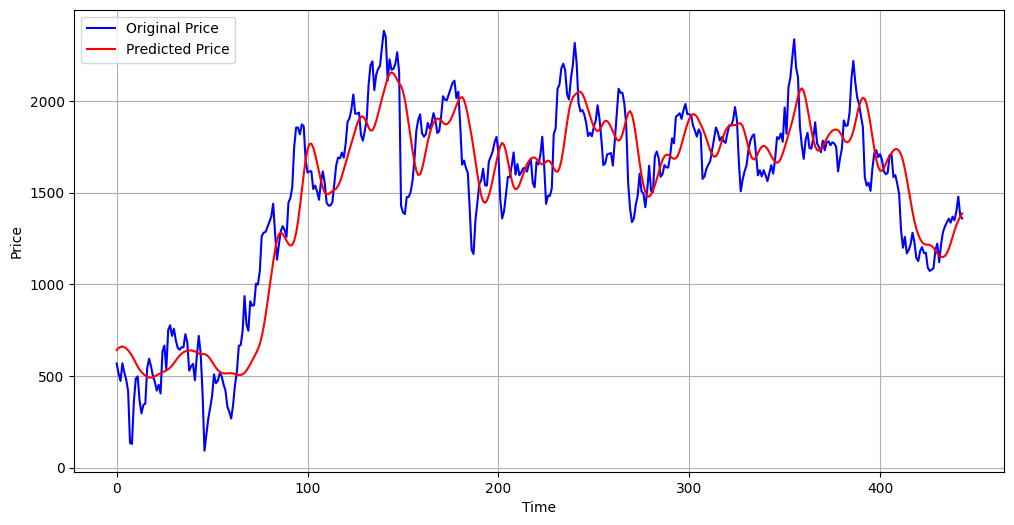

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [49]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.65%


Calculation of R2 score

In [50]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8282162051713395


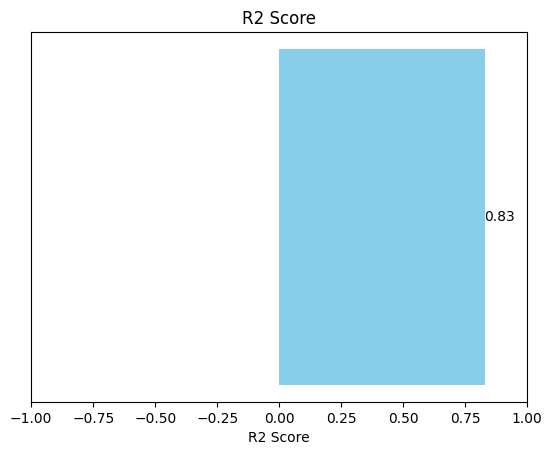

In [51]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

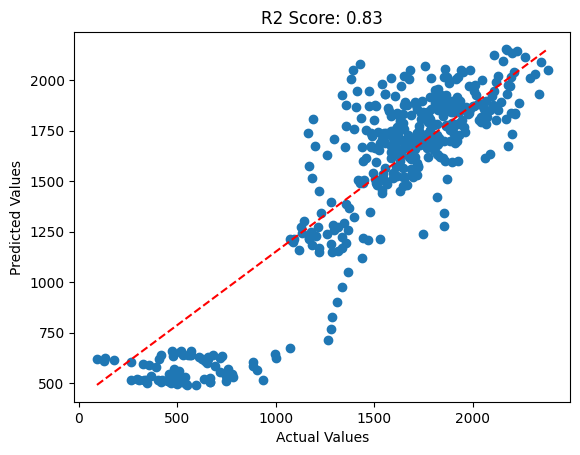

In [52]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()